In [4]:
%run -i framework.py
%run -i real.py
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import xmltodict

## Read Data  
P.S. This step can be skipped for the second run.

In [2]:
df = pd.read_csv('./academia_stackexchange.csv')
df.head()

,Unnamed: 0,@Id_q,@Id_a,@OwnerUserId_a,@CreationDate_a,@Score_a,@OwnerUserId_q,@CreationDate_q,@Score_q,@ViewCount_q,@AcceptedAnswer,@Tags_q
0,0,1,180,NaN,2012-02-16T20:10:34.163,3,5.0,2012-02-14T20:23:40.127,12,347.0,True,<job-search><visa><japan>
1,1,10001,10002,96.0,2013-05-15T15:28:07.020,12,7096.0,2013-05-15T14:55:34.047,12,331.0,True,<publications><copyright>
2,2,10001,10017,643.0,2013-05-16T11:05:54.530,10,7096.0,2013-05-15T14:55:34.047,12,331.0,False,<publications><copyright>
3,3,10003,10004,4394.0,2013-05-15T16:25:21.417,15,386.0,2013-05-15T16:14:03.547,14,1726.0,True,<application>
4,4,10003,10006,1429.0,2013-05-15T17:34:10.530,8,386.0,2013-05-15T16:14:03.547,14,1726.0,False,<application>


In [3]:
users = np.array(df['@OwnerUserId_a'].dropna(how='any').unique())
num_users = users.size
users

array([    96.,    643.,   4394., ...,   9974.,  11013.,   7090.])

We find that this dataset does not include vote numbers. So we need to **Add Vote data to the post data**.

In [4]:
with open('./Votes.xml') as fd:
    votes = xmltodict.parse(fd.read())
dfvotes = pd.DataFrame(votes['votes']['row'])
dfvotes.head()

,@Id,@PostId,@VoteTypeId,@CreationDate,@UserId,@BountyAmount
0,1,6,2,2012-02-14T00:00:00.000,NaN,NaN
1,2,1,2,2012-02-14T00:00:00.000,NaN,NaN
2,3,6,2,2012-02-14T00:00:00.000,NaN,NaN
3,4,3,2,2012-02-14T00:00:00.000,NaN,NaN
4,5,6,2,2012-02-14T00:00:00.000,NaN,NaN


In [7]:
with open('./Posts.xml') as fd2:
    posts = xmltodict.parse(fd2.read())

In [8]:
dfposts = pd.DataFrame(posts['posts']['row'])
dfposts['@Score'] = pd.to_numeric(dfposts['@Score'], errors='coerce')
dfposts['@ViewCount'] = pd.to_numeric(dfposts['@ViewCount'], errors='coerce')
dfposts['@AnswerCount'] = pd.to_numeric(dfposts['@AnswerCount'], errors='coerce')
dfposts['@CommentCount'] = pd.to_numeric(dfposts['@CommentCount'], errors='coerce')
dfposts['@FavoriteCount'] = pd.to_numeric(dfposts['@FavoriteCount'], errors='coerce')
dfposts.head()

,@Id,@PostTypeId,@AcceptedAnswerId,@CreationDate,@Score,@ViewCount,@Body,@OwnerUserId,@LastEditorUserId,@LastEditDate,...,@Title,@Tags,@AnswerCount,@CommentCount,@FavoriteCount,@ClosedDate,@ParentId,@LastEditorDisplayName,@OwnerDisplayName,@CommunityOwnedDate
0,1,1,180,2012-02-14T20:23:40.127,12,347.0,<p>As from title. What kind of visa class do I...,5,2700,2013-10-30T09:14:11.633,...,What kind of Visa is required to work in Acade...,<job-search><visa><japan>,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN
1,2,1,246,2012-02-14T20:26:22.683,7,628.0,<p>Which online resources are available for jo...,5,15723,2014-09-18T13:02:01.180,...,"As a computational chemist, which online resou...",<phd><job-search><online-resource><chemistry>,2.0,2,NaN,2015-03-29T20:06:49.947,NaN,NaN,NaN,NaN
2,3,1,6,2012-02-14T20:27:41.980,36,3198.0,<p>As from title. Not all journals provide the...,5,38446,2016-03-11T14:56:14.233,...,Where can I find the Impact Factor for a given...,<journals><bibliometrics><impact-factor>,4.0,0,10.0,NaN,NaN,NaN,NaN,NaN
3,4,1,145,2012-02-14T20:29:04.737,9,242.0,<p>I have seen many engineering departments wa...,18,15723,2014-09-18T13:02:31.710,...,"In U.S., why do many engineering departments c...",<job-search><united-states><engineering>,2.0,0,1.0,NaN,NaN,NaN,NaN,NaN
4,5,1,9,2012-02-14T20:30:26.703,26,643.0,"<p>What is the h-index, and how does it work ?...",5,1580,2012-10-04T15:25:09.833,...,What is the h-index exactly and how does it work?,<bibliometrics>,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
dfupvotes = dfvotes[dfvotes['@VoteTypeId']=='2'][['@PostId', '@VoteTypeId']]
dfupvotes_count = dfupvotes.groupby('@PostId').count().reset_index()
dfupvotes_count = dfupvotes_count.rename(columns = {'@VoteTypeId' : '@UpvoteCount'})
dfdownvotes = dfvotes[dfvotes['@VoteTypeId']=='3'][['@PostId', '@VoteTypeId']]
dfdownvotes_count = dfdownvotes.groupby('@PostId').count().reset_index()
dfdownvotes_count = dfdownvotes_count.rename(columns = {'@VoteTypeId' : '@DownvoteCount'})

dfpv = dfposts.set_index('@Id').join(dfupvotes_count.set_index('@PostId')).reset_index()
dfpv = dfpv.set_index('@Id').join(dfdownvotes_count.set_index('@PostId')).reset_index()
dfpv['@UpvoteCount'] = dfpv['@UpvoteCount'].fillna(0)
dfpv['@DownvoteCount'] = dfpv['@DownvoteCount'].fillna(0)
dfpv.head()

,@Id,@PostTypeId,@AcceptedAnswerId,@CreationDate,@Score,@ViewCount,@Body,@OwnerUserId,@LastEditorUserId,@LastEditDate,...,@AnswerCount,@CommentCount,@FavoriteCount,@ClosedDate,@ParentId,@LastEditorDisplayName,@OwnerDisplayName,@CommunityOwnedDate,@UpvoteCount,@DownvoteCount
0,1,1,180,2012-02-14T20:23:40.127,12,347.0,<p>As from title. What kind of visa class do I...,5,2700,2013-10-30T09:14:11.633,...,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN,12.0,0.0
1,2,1,246,2012-02-14T20:26:22.683,7,628.0,<p>Which online resources are available for jo...,5,15723,2014-09-18T13:02:01.180,...,2.0,2,NaN,2015-03-29T20:06:49.947,NaN,NaN,NaN,NaN,7.0,0.0
2,3,1,6,2012-02-14T20:27:41.980,36,3198.0,<p>As from title. Not all journals provide the...,5,38446,2016-03-11T14:56:14.233,...,4.0,0,10.0,NaN,NaN,NaN,NaN,NaN,36.0,0.0
3,4,1,145,2012-02-14T20:29:04.737,9,242.0,<p>I have seen many engineering departments wa...,18,15723,2014-09-18T13:02:31.710,...,2.0,0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,0.0
4,5,1,9,2012-02-14T20:30:26.703,26,643.0,"<p>What is the h-index, and how does it work ?...",5,1580,2012-10-04T15:25:09.833,...,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN,27.0,1.0


In [11]:
dfqa_upvote_count = dfpv[dfpv['@PostTypeId']=='2'][['@ParentId', '@UpvoteCount']]
dfqa_upvote_count = dfqa_upvote_count.groupby('@ParentId').sum()
dfqa_upvote_count = dfqa_upvote_count.reset_index().fillna(0)
dfqa_upvote_count = dfqa_upvote_count.rename(columns = {'@ParentId':'@Id_q', '@UpvoteCount':'@TotalUpvotes'})
dfqa_upvote_count.head(10)
dfqa_downvote_count = dfpv[dfpv['@PostTypeId']=='2'][['@ParentId', '@DownvoteCount']]
dfqa_downvote_count = dfqa_downvote_count.groupby('@ParentId').sum()
dfqa_downvote_count = dfqa_downvote_count.reset_index().fillna(0)
dfqa_downvote_count = dfqa_downvote_count.rename(columns = {'@ParentId':'@Id_q', '@DownvoteCount':'@TotalDownvotes'})
dfqa_downvote_count.head(10)

,@Id_q,@TotalDownvotes
0,1,0.0
1,10001,0.0
2,10003,0.0
3,10008,0.0
4,10009,0.0
5,10010,0.0
6,10013,0.0
7,10014,0.0
8,10018,0.0
9,10021,0.0


In [12]:
dfa = dfpv[dfpv['@PostTypeId']=='2'][['@Id', '@ParentId', '@OwnerUserId', '@Score', '@UpvoteCount', '@DownvoteCount']]
dfq = dfpv[dfpv['@PostTypeId']=='1'][['@Id', '@OwnerUserId','@Score', '@ViewCount']]
dfqa = dfa.set_index('@ParentId').join(dfq.set_index('@Id'), lsuffix='_a', rsuffix='_q')
dfqa = dfqa.reset_index()
dfqa = dfqa.rename(columns = {'index' : '@Id_q', '@Id' : '@Id_a', '@Score': '@Score_a', '@ViewCount' : '@ViewCount_q'})
dfqa = dfqa.set_index('@Id_q').join(dfqa_upvote_count.set_index('@Id_q')).reset_index()
dfqa = dfqa.set_index('@Id_q').join(dfqa_downvote_count.set_index('@Id_q')).reset_index()
dfqa.head(11)
# dfqa.to_csv('stackex_full.csv', index=False)

,@Id_q,@Id_a,@OwnerUserId_a,@Score_a,@UpvoteCount,@DownvoteCount,@OwnerUserId_q,@Score_q,@ViewCount_q,@TotalUpvotes,@TotalDownvotes
0,1,180,NaN,3,3.0,0.0,5,12,347.0,3.0,0.0
1,10001,10002,96,12,12.0,0.0,7096,12,331.0,22.0,0.0
2,10001,10017,643,10,10.0,0.0,7096,12,331.0,22.0,0.0
3,10003,10004,4394,15,15.0,0.0,386,14,1726.0,27.0,0.0
4,10003,10006,1429,8,8.0,0.0,386,14,1726.0,27.0,0.0
5,10003,10196,1010,4,4.0,0.0,386,14,1726.0,27.0,0.0
6,10008,10038,929,2,2.0,0.0,7099,7,253.0,11.0,0.0
7,10008,10041,5962,4,4.0,0.0,7099,7,253.0,11.0,0.0
8,10008,14476,8343,1,1.0,0.0,7099,7,253.0,11.0,0.0
9,10008,14477,8067,4,4.0,0.0,7099,7,253.0,11.0,0.0


In [2]:
import numpy as np
import pandas as pd
dfqa = pd.read_csv('./stackex_full.csv') 
np.array(dfqa['@Id_q'].dropna(how='any').unique()).size

15774

In [3]:
np.array(dfqa['@Id_a'].dropna(how='any').unique()).size

40319

## Statistics to measure the performance of individual answer  
We only care about each user and its upvote/downvote counts per answer, regardless of the question.

In [5]:
dfqa = pd.read_csv('./stackex_full.csv') 

In [6]:
df_stat = dfqa[['@OwnerUserId_a', '@UpvoteCount', '@DownvoteCount']]
df_stat = df_stat.assign(small_conservative = np.round((dfqa['@UpvoteCount']+2)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+10), decimals = 4))
df_stat = df_stat.assign(balanced = np.round((dfqa['@UpvoteCount']+10)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+20), decimals = 4))
df_stat = df_stat.assign(large_conservative = np.round((dfqa['@UpvoteCount']+8)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+40), decimals = 4))
df_stat = df_stat.rename(columns = {'small_conservative' : '(2, 8)',
                                    'large_conservative': '(8, 32)',
                                    'balanced': '(10, 10)'
                                       })
df_stat.head(10)

,@OwnerUserId_a,@UpvoteCount,@DownvoteCount,"(2, 8)","(10, 10)","(8, 32)"
0,NaN,3.0,0.0,0.3846,0.5652,0.2558
1,96.0,12.0,0.0,0.6364,0.6875,0.3846
2,643.0,10.0,0.0,0.6000,0.6667,0.3600
3,4394.0,15.0,0.0,0.6800,0.7143,0.4182
4,1429.0,8.0,0.0,0.5556,0.6429,0.3333
5,1010.0,4.0,0.0,0.4286,0.5833,0.2727
6,929.0,2.0,0.0,0.3333,0.5455,0.2381
7,5962.0,4.0,0.0,0.4286,0.5833,0.2727
8,8343.0,1.0,0.0,0.2727,0.5238,0.2195
9,8067.0,4.0,0.0,0.4286,0.5833,0.2727


In [7]:
users = np.array(df_stat['@OwnerUserId_a'].dropna(how='any').unique())
num_users = users.size
data = np.array([np.array(df_stat[df_stat['@OwnerUserId_a']==user]['(2, 8)']) for user in users],dtype=object)
# discard some candidates
data_sizes = np.array([data[i].size for i in range(num_users)])
candidates = np.array([i for i in range(num_users) if data_sizes[i] >= 100])

In [8]:
import pickle5 as pickle
with open('candidates.pickle', 'wb') as f:
    pickle.dump(candidates, f)

In [9]:
df2 = df_stat[df_stat['@OwnerUserId_a'].isin(users[candidates])]
pairs = ['(2, 8)', '(8, 32)', '(10, 10)']

In [23]:
df2.to_csv('stackex_ECDF.csv', index=False)

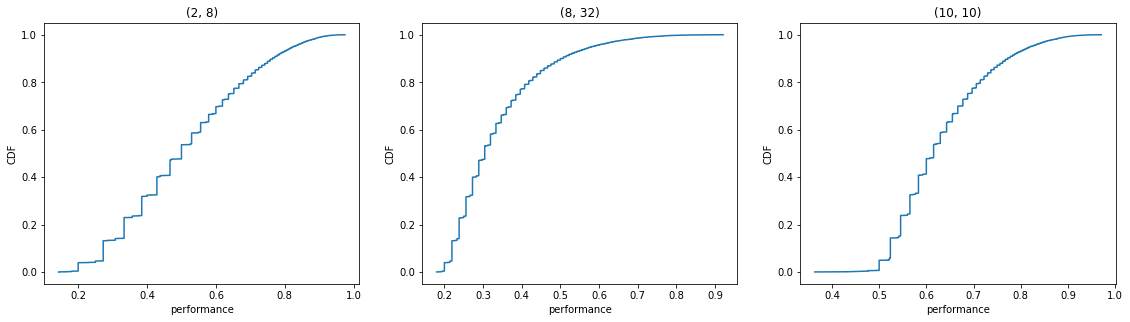

In [12]:
from itertools import product 
fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8*1))
axes[0].plot(ECDF(df2['(2, 8)']).x, ECDF(df2['(2, 8)']).y)
axes[1].plot(ECDF(df2['(8, 32)']).x, ECDF(df2['(8, 32)']).y)
axes[2].plot(ECDF(df2['(10, 10)']).x, ECDF(df2['(10, 10)']).y)
for i in range(3):
    axes[i].set_ylabel("CDF")
    axes[i].set_xlabel("performance")
    axes[i].set_title(pairs[i])
plt.show()

In [13]:
df_stat.to_csv('stackex.csv', index=False)
#df_stat = pd.read_csv('./stackex.csv') 

## Comparison Start  
We test set size $k=5$ and $k=10$ with sample size 100.  
We compare the results of our method with $\epsilon = 0.01$ and that of test scores.

In [14]:
def create_output_comp():
    column_labels_raw = ['obj','k','measure', 'test_number', 'ratio_TS', 'ratio_EB']
    df_raw = pd.DataFrame(columns=column_labels_raw)
    df_raw.to_csv('res_score_full.csv', index=False)

In [15]:
def run_comparison(n, k, pair, n_sample, samples_p, samples_q, obj, n_sets, set_items):
    df = pd.read_csv('./res_score_full.csv')
    
    value_P = get_value(n, n_sample, samples_p, obj, set_items)
    value_Q = get_value(n, n_sample, samples_q, obj, set_items)
    value_S = get_valueS(n, k, n_sample, samples_p, obj, set_items)
    
    for j in range(n_sets):    
        df = df.append({'obj': obj, 'k':k, 'measure': pair,
                        'test_number': j+1, 'ratio_EB': value_Q[j]/value_P[j],
                        'ratio_TS': value_S[j]/value_P[j]}, ignore_index = True)
    df.to_csv('res_score_full.csv', index=False)

In [16]:
create_output_comp()

In [18]:
n = len(candidates)
for pair in pairs:
    data = np.array([np.array(df_stat[df_stat['@OwnerUserId_a']==user][pair]) for user in users],dtype=object)
    samples_p = Real_sample(data, candidates, n_sample)
    samples_q = Discretized_real_sample(data, candidates, 0.01, n_sample)
    for k in kvals:
        set_items = get_sets(n, k, n_sets)
        for obj in objs:  
            run_comparison(n, k, pair, n_sample, samples_p, samples_q, obj, n_sets, set_items)   

In [21]:
def box_plot(k):
    df = pd.read_csv('./res_score_full.csv')
    fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8*1))
    flierprops = dict(marker='o', markeredgecolor='lightgrey')
    for i in range(3):
        current = df[(df['k'] == k)& (df['measure'] == pairs[i])]
        current.boxplot(ax = axes[i], column = 'ratio_EB', by = 'obj', flierprops = flierprops)
        axes[i].set_xlabel("objectives")
        axes[i].set_ylabel("v(S)/u(S)")
        axes[i].set_title(pairs[i])
        axes[i].set_ylim((0.5, 1.5)) 
    fig.suptitle('')  

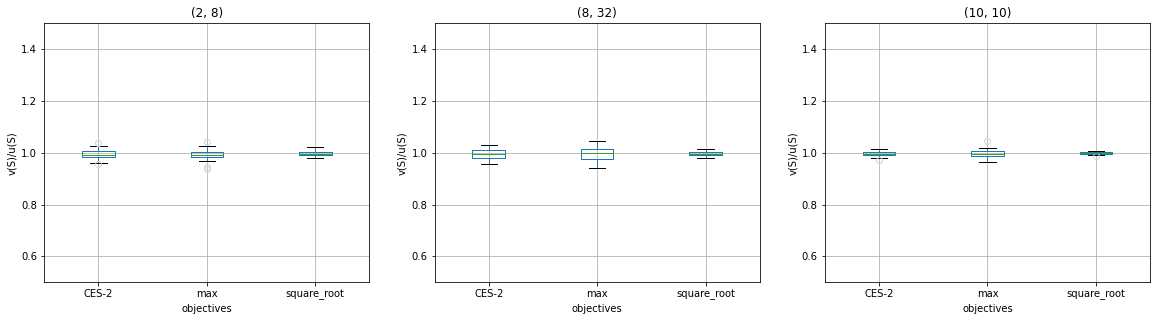

In [22]:
box_plot(5)